# CLASSIFY YELP REVIEWS (NLP)

## Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Import the dataset

In [3]:
yelp_df = pd.read_csv("yelp.csv")

In [4]:
yelp_df.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
yelp_df.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [8]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [9]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


## Visualize the dataset

In [13]:
yelp_df['length'] = yelp_df['text'].apply(len)

(array([217., 383., 419., 489., 531., 536., 544., 525., 486., 511., 430.,
        388., 385., 337., 346., 312., 264., 253., 229., 185., 176., 175.,
        172., 135., 117., 121., 117., 103.,  87.,  70.,  76.,  64.,  70.,
         58.,  63.,  47.,  49.,  36.,  40.,  32.,  32.,  34.,  27.,  21.,
         16.,  18.,  18.,  16.,  24.,  14.,  14.,  10.,  13.,  11.,   6.,
         11.,  11.,   8.,   4.,   8.,  10.,  10.,   5.,   6.,   3.,   6.,
          3.,   3.,   5.,   1.,   3.,   2.,   2.,   3.,   1.,   5.,   2.,
          0.,   2.,   1.,   1.,   1.,   5.,   0.,   1.,   1.,   0.,   3.,
          2.,   3.,   0.,   1.,   3.,   0.,   0.,   2.,   1.,   1.,   1.,
          7.]),
 array([1.00000e+00, 5.09600e+01, 1.00920e+02, 1.50880e+02, 2.00840e+02,
        2.50800e+02, 3.00760e+02, 3.50720e+02, 4.00680e+02, 4.50640e+02,
        5.00600e+02, 5.50560e+02, 6.00520e+02, 6.50480e+02, 7.00440e+02,
        7.50400e+02, 8.00360e+02, 8.50320e+02, 9.00280e+02, 9.50240e+02,
        1.00020e+03, 1.050

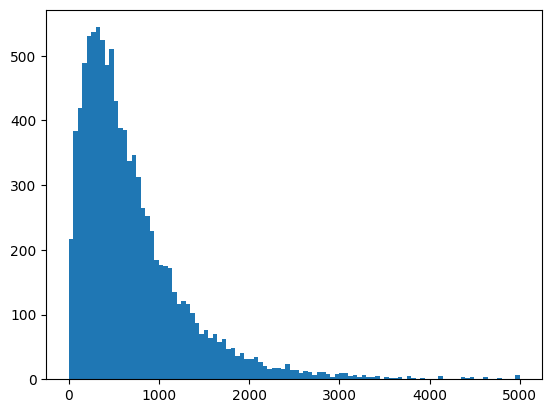

In [17]:
plt.hist(yelp_df['length'], bins=100)

In [28]:
yelp_df[yelp_df['length'] == 123]['text'].iloc[0]

'Pleasantly surprised, great drink specials and cute outdoor seating.\nFood was really good and I look forward to going back!'

<Axes: xlabel='count', ylabel='stars'>

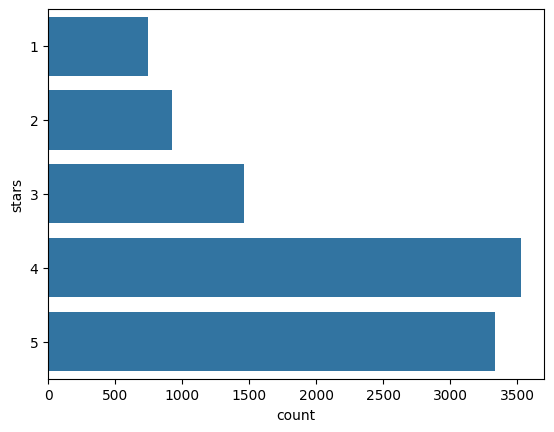

In [33]:
sns.countplot(y = 'stars', data=yelp_df)

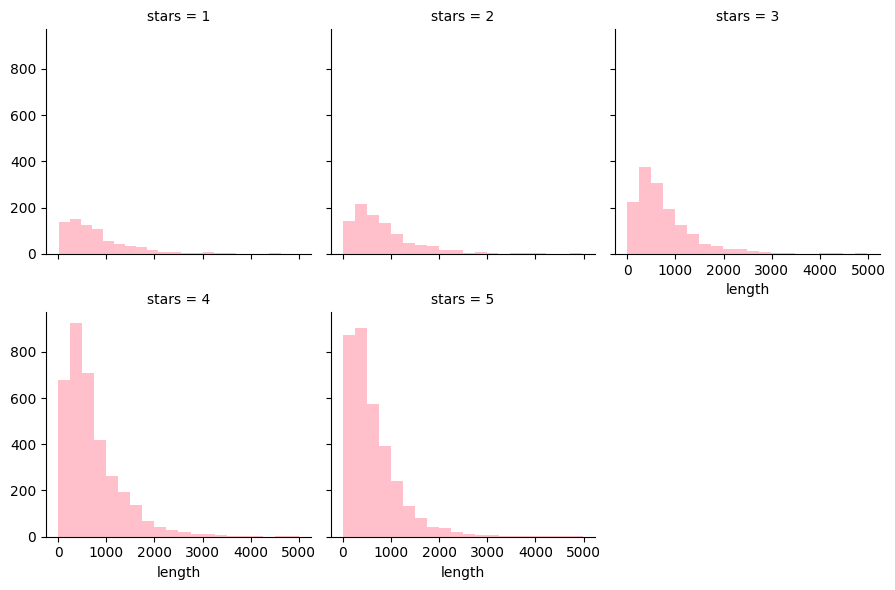

In [38]:
g = sns.FacetGrid(data=yelp_df, col='stars', col_wrap=3)
g.map(plt.hist, 'length', bins = 20, color = 'pink')

## Preprocessing

In [64]:
import string
from nltk.corpus import stopwords

In [66]:
def msg_cln(msg):
    msg_without_punc = [char for char in msg if char not in string.punctuation]
    msg_join = ''.join(msg_without_punc)
    msg_without_stp = [word for word in msg_join.split() if word.lower() not in stopwords.words('english')]
    return msg_without_stp


In [73]:
yelp_df_text_cleaned = yelp_df['text'].apply(msg_cln)

['oldish',
 'man',
 'owns',
 'store',
 'sweet',
 'Perhaps',
 'sweeter',
 'cookies',
 'ice',
 'cream',
 'Heres',
 'lowdown',
 'Giant',
 'ice',
 'cream',
 'cookie',
 'sandwiches',
 'super',
 'cheap',
 'flavor',
 'permutations',
 'basically',
 'endless',
 'snickerdoodle',
 'cookies',
 'cream',
 'ice',
 'cream',
 'marvelous']